In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import nltk
import boto3
from s3 import get_file
import re
import mglearn

In [2]:
s3 = boto3.resource('s3')
lyrics = get_file(s3,'s3ssp',download_file='NLP_Data/master_lyrics_audio_features.csv',rename_file='Data/0320_2020_nlp.csv')

In [3]:
df = pd.read_csv(lyrics,sep='|',encoding='utf-8')

In [4]:
df = df.drop(columns=['instrumentalness','key','mode','liveness','speechiness','time_signature'])

In [5]:
df

,artist_uri_x,artist_name,track_uri,track_name,lyrics,acousticness,danceability,energy,loudness,tempo,valence
0,6vWDO969PvNqNYHIOW5v0m,Beyoncé,5Ui8M6tfknhXo4MuGHt3Dy,why don't you love me,"N-n-now, honey\nYou better sit down and look a...",0.04630,0.693,0.730,-4.571,136.882,0.7410
1,6vWDO969PvNqNYHIOW5v0m,Beyoncé,5dhPqcLr5EcSd7Fe4fslCq,save the hero,I lay alone awake at night\nSorrow fills my ey...,0.67300,0.551,0.467,-10.364,116.966,0.1480
2,6vWDO969PvNqNYHIOW5v0m,Beyoncé,5dWTQXVHdoIsSLpEyS3woy,broken-hearted girl,Youre everything I thought you never were\nAnd...,0.50300,0.336,0.424,-7.203,82.149,0.1590
3,6vWDO969PvNqNYHIOW5v0m,Beyoncé,0QRxJvOohS8yiGC1n98uFM,lift ev'ry voice and sing - homecoming live,He is always laughin' and flirting with me\nAn...,0.12400,0.127,0.409,-13.089,79.904,0.0782
4,6vWDO969PvNqNYHIOW5v0m,Beyoncé,4DActPOAtak2m8meZeMt3B,no angel,"This is for my fans\n(Uhu, uhu)\nThis is for m...",0.04240,0.571,0.466,-9.153,111.580,0.5120
5,6vWDO969PvNqNYHIOW5v0m,Beyoncé,4DActPOAtak2m8meZeMt3B,no angel,"This is for my fans\n(Uhu, uhu)\nThis is for m...",0.04240,0.571,0.466,-9.153,111.580,0.5120
6,6vWDO969PvNqNYHIOW5v0m,Beyoncé,63FrXif0Pdu4NAPvTh87mw,mine (feat. drake),[Verse 1: Beyonce]\nI've been watching for the...,0.06730,0.557,0.428,-11.299,103.009,0.0996
7,6vWDO969PvNqNYHIOW5v0m,Beyoncé,49sXkAcR5LvOrtq5Qcn5cf,superpower (feat. frank ocean),[Verse 1]\nWhen the palm of my two hands hold ...,0.64300,0.527,0.334,-11.540,80.334,0.1860
8,6vWDO969PvNqNYHIOW5v0m,Beyoncé,7cioKB5CHVzk09SOtTyn0T,haunted,[Intro: Presenter]\nThe winner is\nBeyonce Kno...,0.10300,0.436,0.534,-9.416,122.822,0.3250
9,6vWDO969PvNqNYHIOW5v0m,Beyoncé,7cioKB5CHVzk09SOtTyn0T,haunted,[Intro: Presenter]\nThe winner is\nBeyonce Kno...,0.10300,0.436,0.534,-9.416,122.822,0.3250


In [6]:
lyrics = df['lyrics'].str.replace('\n',' ')
df['lyrics'] = lyrics.to_frame()
#df_clean = .str.replace('(\[.*\])*','')

In [7]:
df = df.dropna()
df_lyrics = df['lyrics']
df_playlist = df
df_playlist['instrumental'] = df_lyrics.apply(lambda x: x.find('instrumental'))
df_playlist = df.drop(df[df['instrumental'] != -1].index)
#df = df.drop(df[df['lyrics']=='This is an instrumental'].index)

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
www =df_playlist[df_playlist['lyrics']=='instrumental']
www

,artist_uri_x,artist_name,track_uri,track_name,lyrics,acousticness,danceability,energy,loudness,tempo,valence,instrumental


## Topic Analysis

In [28]:
#Control Panel - Hyper Parameters

#Count Vectorizer
max_features = 200
max_df = .95


#LDA
n_topics = 5



In [29]:
vect = CountVectorizer(max_features, max_df,stop_words='english')
X = vect.fit_transform(df_playlist['lyrics'])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics, learning_method="batch",
                                max_iter=1, random_state=0)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
document_topics = lda.fit_transform(X)

print("lda.components_.shape: {}".format(lda.components_.shape))

# For each topic (a row in the components_), sort the features (ascending)
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Get the feature names from the vectorizer
feature_names = np.array(vect.get_feature_names())

# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=4)

## Create Spotify Playlist

In [16]:
import requests
import json
import pandas as pd
import spotipy#authentication
import spotipy.util as util#authentication
from spotipy.oauth2 import SpotifyClientCredentials#authentication

In [21]:
cid = '049ade7215e54c63a2b628f3784dc407'
secret = '5d30770120ad4dbbabbb5ce538110e05'
redirect_uri = 'http://google.com/'
username = 'name'

In [24]:
#Authentication

scope = 'playlist-modify-private'
token_playlist = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token_playlist:
    sp_playlist = spotipy.Spotify(auth=token_playlist)
else:
    print("Can't get token for", username)
    
#Authentication

scope = 'user-read-private'
token_user = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token_user:
    sp_user = spotipy.Spotify(auth=token_user)
else:
    print("Can't get token for", username)



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=049ade7215e54c63a2b628f3784dc407&response_type=code&redirect_uri=http%3A%2F%2Fgoogle.com%2F&scope=playlist-modify-private in your browser


Enter the URL you were redirected to: https://www.google.com/?code=AQCkFa5AFKZjSht3tQhhpO1rc65v2plXTk3HqkQzXdf16fZ14ML45Hi34TMyU6TJVr4RZJblndgi9IRmMTSu5ugrGjeYqM75mHTnqn_z3ZY05v_t1HBqgjPNmMoK7J3rbMp9G1kgj5jwU7VRtdIPorVgkOq_vUyTN-9RIrpO5qdlrS5tggFZ0xuVJz17O0FPnIkpzTvFN9uqxi1GH0ZGukM




            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you wer

In [35]:
def get_user_id(url):
    try:
        resp = requests.get(url,headers={'Authorization': 'Bearer ' + token_user},
                             #data={"name": "SSP"}
                           )
        
        resp.raise_for_status()
    except requests.exceptions.HTTPError as err:
        print(err)
        
    
    response = resp.json()
    userid = response['id']
    
    return userid


In [36]:
user_id = get_user_id('https://api.spotify.com/v1/me')

In [37]:
identification = user_id
identification

'124399179'

In [38]:
playlist = sp_playlist.user_playlist_create(identification,'SSP', public=False, description="First SSP")

In [39]:
playlist

{'collaborative': False,
 'description': 'First SSP',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/0KY4ImiybUqnBeB29rPsoC'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/0KY4ImiybUqnBeB29rPsoC',
 'id': '0KY4ImiybUqnBeB29rPsoC',
 'images': [],
 'name': 'SSP',
 'owner': {'display_name': 'Adam Goldstein',
  'external_urls': {'spotify': 'https://open.spotify.com/user/124399179'},
  'href': 'https://api.spotify.com/v1/users/124399179',
  'id': '124399179',
  'type': 'user',
  'uri': 'spotify:user:124399179'},
 'primary_color': None,
 'public': False,
 'snapshot_id': 'MSxiNDA1NjBkNTE2ZjJhMjY4YWYxNzZiZjZjNGM0YjQzMmM1ZjBjNTI3',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/0KY4ImiybUqnBeB29rPsoC/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0},
 'type': 'playlist',
 'uri': 'spotify:playlist:0KY4ImiybUqnBeB29rPsoC'}

In [34]:
playlist_tracks = sp_playlist.user_playlist_add_tracks(identification,playlist['id'],df_ssp['track_uri'], position=None)

SpotifyException: http status: 400, code:-1 - https://api.spotify.com/v1/users/124399179/playlists/3boO9chXNp1qepAKYVUOeK/tracks:
 You can add a maximum of 100 tracks per request.

## Rough

In [8]:
#Pick from bag of words how many elements
from sklearn.decomposition import NMF, LatentDirichletAllocation
no_features = 500

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(decode_error='strict',#strip_accents=,
                                   stop_words='english',ngram_range=(1,1),
                                   max_df=0.95,min_df=2, 
                                   max_features=no_features#vocabulary=,
                                   #binary=,#norm=,
                                   #use_idf=True,
                                   #smooth_idf=True,
                                   #sublinear_tf=
                                   )


tfidf = tfidf_vectorizer.fit_transform(df_playlist['lyrics'].values.astype('U'))
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [9]:
#Divide those elements into how many topics
no_topics = 10

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [10]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {i}:".format(i=topic_idx))
        print([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        a = []
        b = a.append([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
       
        return a
#How many terms per topic
no_top_terms = 10
a = display_topics(nmf, tfidf_feature_names, no_top_terms)

Topic 0:
['instrumental', 'music', 'song', 'soon', 'chorus', 'gold', 'good', 'gonna', 'gone', 'gon', 'young', 'got']


In [11]:
a[0]

['instrumental',
 'music',
 'song',
 'soon',
 'chorus',
 'gold',
 'good',
 'gonna',
 'gone',
 'gon',
 'young',
 'got']

In [46]:
ssp = []
def playlist_element(lyrics,element,playlist_position):
    if(lyrics.find(element)!= -1):
        return playlist_position
    else:
        return None


for slot in range(len(a[0])):
    for element in a[0]:
#reset to org state
        df_playlist = df
        df_playlist['playlist_index_{s}'.format(s=slot)] = df_playlist.apply(lambda x: playlist_element(x['lyrics']
                                                                            ,element[slot],slot),axis=1)
        x = df_playlist.dropna()
        y = x[(x['valence'] == x['valence'].max())]
        z = y[(y['energy'] == y['energy'].max())]
        
        print(z.track_uri.values[0])
        ssp.append({'artist_name':z.artist_name.values[0],'track_name':z.track_name.values[0],'track_uri':z.track_uri.values[0],
                   'valence':y.valence.values[0],'energy':z.energy.values[0],'lyrics':z.lyrics.values[0]})
        
        df_playlist = df_playlist.drop(index=z.index)


1S6rSlrHMUQEgyI43PnOkF
1S6rSlrHMUQEgyI43PnOkF
1S6rSlrHMUQEgyI43PnOkF


KeyboardInterrupt: 

In [14]:
df_ssp = pd.DataFrame(ssp)
df_ssp

,artist_name,energy,lyrics,track_name,track_uri,valence
0,The Alan Parsons Project,0.539000,(instrumental),hawkeye,5JpMupq4GNsFEwzcODs8aW,0.981
1,A*Teens,0.976000,"Floorfiller, floorfiller, floorfiller Hey Mr. ...",floorfiller - radio edit,5jjt6Qa4PbsgpEMgz5WzL1,0.990
2,Aaron Neville,0.695000,You know night after night these guys Are sett...,the roadie song,1Vgulkd0dBBl5owwtxL6OY,0.990
3,The Boomtown Rats,0.912000,Tell me what you're doing coming in so late at...,never bite the hand that feeds,2ymOkI2ARTirkd7l5Nk2cw,0.981
4,2NE1,0.967000,I made it through the wilderness Somehow I mad...,like a virgin,36rsxJAqcs4USlhBiRQhVn,0.976
5,Caro Emerald,0.865000,I close my eyes and dream about a sunny holida...,stuck,17stIeb13oTMORVSKHmR6f,0.982
6,The Gadjits,0.967000,Why I ain't your buddy Why I ain't your buddy ...,backup,2rQRxvAjxl7X8awpALnpLs,0.981
7,Eddie Hodges,0.857000,"I'm gonna knock on your door, ring on your bel...",i'm gonna knock on your door,24qcDZtqYSUOr83QXgy8aa,0.993
8,Four Tops,0.846000,You're sweet as a honey bee But like a honey b...,it's the same old song - single version / mono,4LvjTB3hofVlBKU9YXdnuH,0.983
9,Eddie Hodges,0.857000,"I'm gonna knock on your door, ring on your bel...",i'm gonna knock on your door,24qcDZtqYSUOr83QXgy8aa,0.993


## Visualization (Valence Curve, Energy Curve)

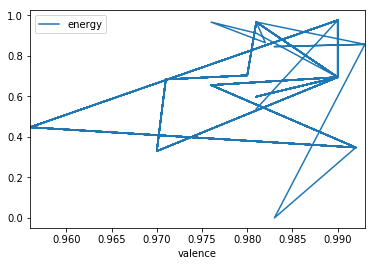

In [45]:
df_ssp.plot.line(x='valence',y='energy')

## unigrams

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {i}:".format(i=topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
#How many words per topic
no_top_words = 4
display_topics(nmf, tfidf_feature_names, no_top_words)